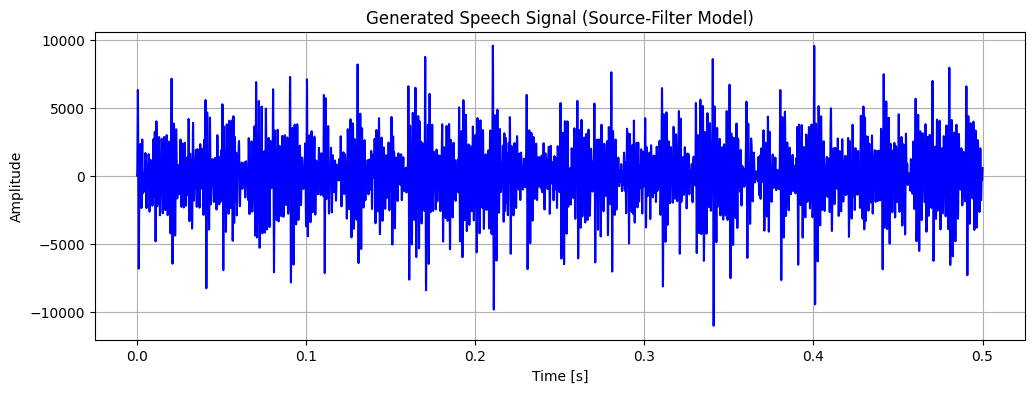

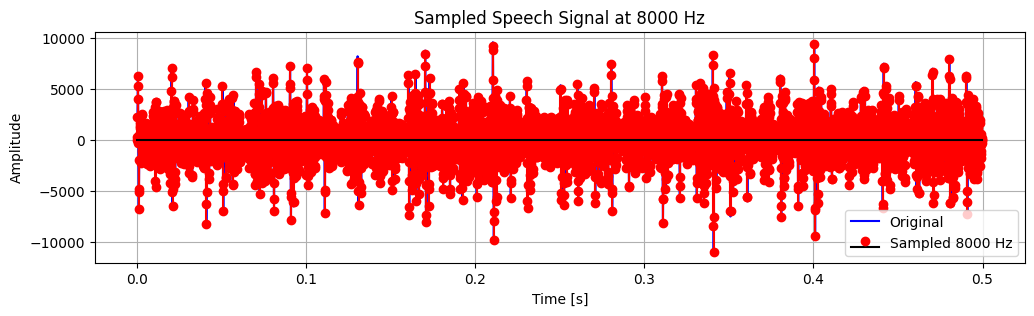

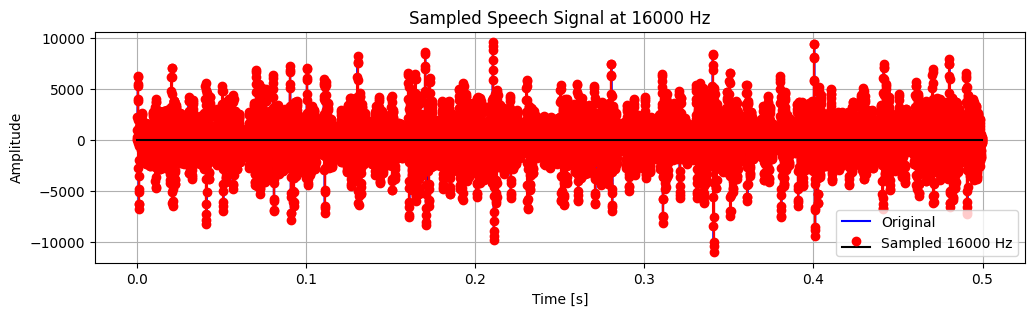

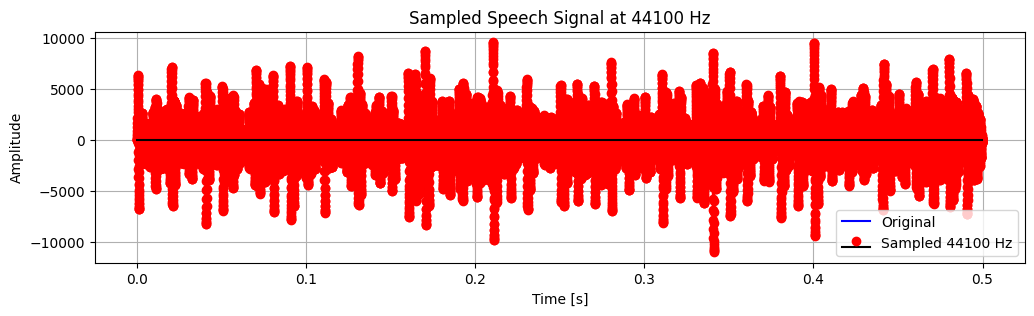

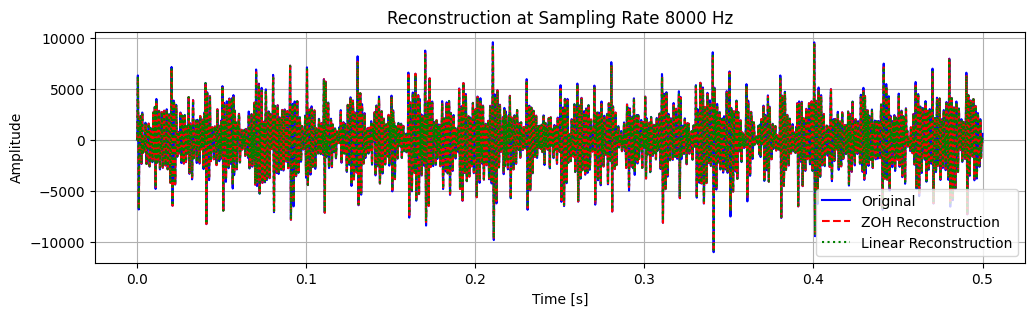

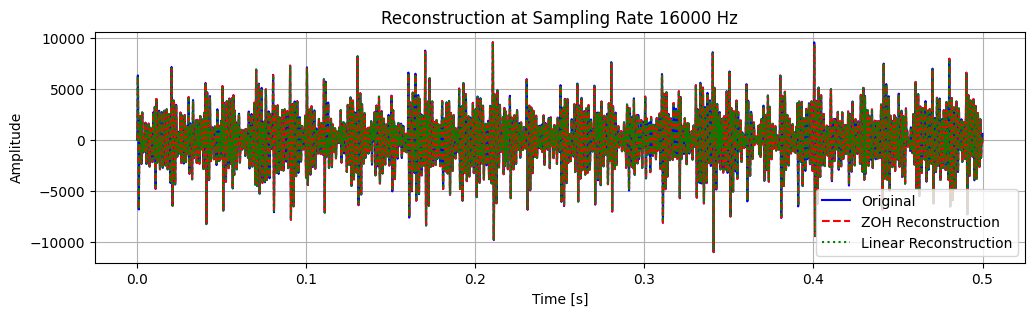

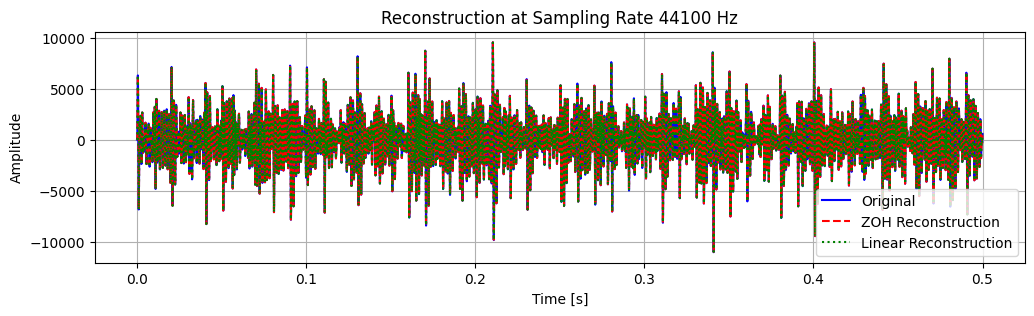

Mean Squared Error (MSE) for Reconstructed Signals:
Sampling Rate 8000 Hz: ZOH MSE = 205710.253292, Linear MSE = 14027.229245
Sampling Rate 16000 Hz: ZOH MSE = 51755.461319, Linear MSE = 1062.139565
Sampling Rate 44100 Hz: ZOH MSE = 6807.447147, Linear MSE = 61.029761

Inference:
1. The source-filter model generates a speech-like waveform with vocal tract formants shaping the source impulses.
2. Higher sampling rates reduce MSE and provide more accurate reconstruction.
3. Linear interpolation produces smoother and more accurate reconstruction than zero-order hold.
4. Lower sampling rates lead to noticeable distortion and loss of speech clarity.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# -----------------------------
# Step 1: Parameters
# -----------------------------
fs = 44100  # Original sampling rate (Hz)
duration = 0.5  # 0.5 seconds
t = np.linspace(0, duration, int(fs*duration))

# -----------------------------
# Step 2: Generate source signal
# -----------------------------
# Glottal pulse train for voiced sounds (~100 Hz pitch)
pitch_freq = 100  # Hz
glottal_source = np.zeros_like(t)
glottal_pulse_interval = int(fs/pitch_freq)
glottal_source[::glottal_pulse_interval] = 1.0  # impulse train

# White noise for unvoiced sounds
np.random.seed(0)
noise_source = np.random.randn(len(t)) * 0.05  # low amplitude noise

# Mix voiced and unvoiced
source_signal = glottal_source + noise_source

# -----------------------------
# Step 3: Vocal tract filter (formants)
# -----------------------------
# Simple 3-formant all-pole filter (example for vowel 'a')
formant_freqs = [700, 1220, 2600]  # Hz
formant_bw = [80, 90, 120]  # bandwidths

# Convert to filter coefficients
a = [1.0]
for f, bw in zip(formant_freqs, formant_bw):
    r = np.exp(-np.pi*bw/fs)
    theta = 2*np.pi*f/fs
    a = np.convolve(a, [1, -2*r*np.cos(theta), r**2])

# Apply filter to source signal
speech_signal = lfilter([1], a, source_signal)

# -----------------------------
# (b) Plot generated speech signal
# -----------------------------
plt.figure(figsize=(12,4))
plt.plot(t, speech_signal, color='blue')
plt.title("Generated Speech Signal (Source-Filter Model)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# -----------------------------
# (c) Sampling at different rates
# -----------------------------
sampling_rates = [8000, 16000, 44100]
sampled_signals = {}
sampled_times = {}

for Fs in sampling_rates:
    t_sampled = np.arange(0, duration, 1/Fs)
    interp_func = interp1d(t, speech_signal, kind='linear')
    x_sampled = interp_func(t_sampled)
    
    sampled_signals[Fs] = x_sampled
    sampled_times[Fs] = t_sampled
    
    # Plot sampled signals
    plt.figure(figsize=(12,3))
    plt.plot(t, speech_signal, label='Original', color='blue')
    plt.stem(t_sampled, x_sampled, linefmt='red', markerfmt='ro', basefmt='k', label=f'Sampled {Fs} Hz')
    plt.title(f"Sampled Speech Signal at {Fs} Hz")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# -----------------------------
# (d) Reconstruction and MSE
# -----------------------------
mse_results = {}

for Fs in sampling_rates:
    t_sampled = sampled_times[Fs]
    x_sampled = sampled_signals[Fs]
    
    # Zero-order hold (nearest neighbor)
    zoh_func = interp1d(t_sampled, x_sampled, kind='nearest', fill_value='extrapolate')
    x_zoh = zoh_func(t)
    
    # Linear interpolation
    lin_func = interp1d(t_sampled, x_sampled, kind='linear', fill_value='extrapolate')
    x_lin = lin_func(t)
    
    # Compute MSE
    mse_zoh = mean_squared_error(speech_signal, x_zoh)
    mse_lin = mean_squared_error(speech_signal, x_lin)
    
    mse_results[Fs] = {'ZOH': mse_zoh, 'Linear': mse_lin}
    
    # Plot reconstructed signals
    plt.figure(figsize=(12,3))
    plt.plot(t, speech_signal, label='Original', color='blue')
    plt.plot(t, x_zoh, '--', label='ZOH Reconstruction', color='red')
    plt.plot(t, x_lin, ':', label='Linear Reconstruction', color='green')
    plt.title(f"Reconstruction at Sampling Rate {Fs} Hz")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# -----------------------------
# (e) Print MSE Results
# -----------------------------
print("Mean Squared Error (MSE) for Reconstructed Signals:")
for Fs in sampling_rates:
    print(f"Sampling Rate {Fs} Hz: ZOH MSE = {mse_results[Fs]['ZOH']:.6f}, Linear MSE = {mse_results[Fs]['Linear']:.6f}")

# -----------------------------
# Inference
# -----------------------------
print("\nInference:")
print("1. The source-filter model generates a speech-like waveform with vocal tract formants shaping the source impulses.")
print("2. Higher sampling rates reduce MSE and provide more accurate reconstruction.")
print("3. Linear interpolation produces smoother and more accurate reconstruction than zero-order hold.")
print("4. Lower sampling rates lead to noticeable distortion and loss of speech clarity.")
